In [14]:
from citipy import citipy
import openweathermapy.core as owm
import pandas as pd
import matplotlib.pyplot as plt
import random
from config import api_key 
import requests 
from pprint import pprint
import datetime
now = datetime.datetime.now()
count=500

In [15]:
city = citipy.nearest_city(22.99, 120.21)
city.city_name

'tainan'

In [16]:
lat = []
lng = []
for i in range(count):
    lat.append(float("{0:.2f}".format(random.uniform(-90,90))))
    lng.append(float("{0:.2f}".format(random.uniform(-180,180))))  


In [17]:
cities = []
for i in range(count):
    cities.append(citipy.nearest_city(lat[i],lng[i]).city_name)


In [18]:

#for i in range(500):
#    print(cities[i].city_name)
df=pd.DataFrame(data=cities)
df.columns = ["city"]
df['lat']=lat
df['lng']=lng
df.head()

,city,lat,lng
0,albany,-49.02,112.25
1,ushuaia,-82.17,-78.83
2,mys shmidta,87.51,-174.41
3,rikitea,-45.41,-139.83
4,melito di porto salvo,37.09,16.36


In [20]:
# call openweathermapy to get the weather 

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key +'&q='

cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []

for i in range(len(df['city'])):
    print(f"processing {df['city'][i]} #{i}")
    response = requests.get(base_url+df['city'][i])
    print(response.url)
    response_json = response.json()
    #pprint(response_json)
    if(response_json['cod'] == 200):
        cloudiness.append(response_json['clouds']['all']) # cloudiness
        country.append(response_json['sys']['country']) # country
        date.append(response_json['dt']) # date
        humidity.append(response_json['main']['humidity']) # humidity
        max_temp.append(response_json['main']['temp_max']) # max_temp
        wind_speed.append(response_json['wind']['speed']) # wind_speed
    else:
        cloudiness.append(0) # cloudiness
        country.append(0) # country
        date.append(0) # date
        humidity.append(0) # humidity
        max_temp.append(0) # max_temp
        wind_speed.append(0) # wind_speed


processing albany #0
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=albany
processing ushuaia #1
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia
processing mys shmidta #2
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mys%20shmidta
processing rikitea #3
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea
processing melito di porto salvo #4
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=melito%20di%20porto%20salvo
processing havoysund #5
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=havoysund
processing provideniya #6
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=provideniya
processing tukt

In [22]:
print(len(cloudiness))
df['cloudiness'] = cloudiness
df['country'] = country
df['date'] = date
df['humidity']=humidity
df['max_temp'] = max_temp
df['wind_speed'] = wind_speed
df.head()

500


,city,lat,lng,cloudiness,country,date,humidity,max_temp,wind_speed
0,albany,-49.02,112.25,1,US,1522122840,58,33.80,4.72
1,ushuaia,-82.17,-78.83,75,AR,1522119600,80,41.00,27.51
2,mys shmidta,87.51,-174.41,0,0,0,0,0.00,0.00
3,rikitea,-45.41,-139.83,56,PF,1522124749,100,80.05,16.69
4,melito di porto salvo,37.09,16.36,0,IT,1522122900,76,51.80,5.82


Text(0,0.5,'Max Temperature(F)')

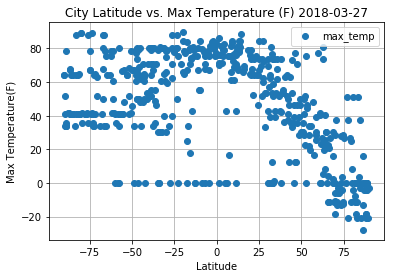

In [23]:
ax = df.plot(x='lat',y='max_temp',style='o',title=f"City Latitude vs. Max Temperature (F) {str(now)[:10]}",grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature(F)')

Text(0,0.5,'humidity(%)')

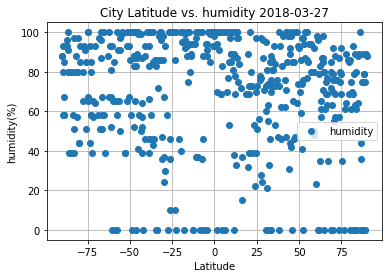

In [24]:
ax = df.plot(x='lat',y='humidity',style='o',title=f"City Latitude vs. humidity {str(now)[:10]}",grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('humidity(%)')

Text(17.2,0.5,'Cloudiness(%)')

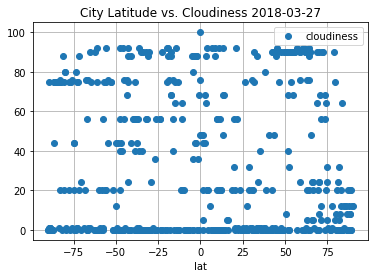

In [25]:
df.plot(x='lat',y='cloudiness',style='o',title=f"City Latitude vs. Cloudiness {str(now)[:10]}",grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness(%)')

Text(0,0.5,' Wind Speed (mph)')

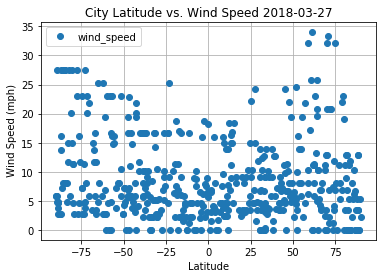

In [26]:
ax = df.plot(x='lat',y='wind_speed',style='o',title=f"City Latitude vs. Wind Speed {str(now)[:10]}",grid=True)
ax.set_xlabel('Latitude')
ax.set_ylabel(' Wind Speed (mph)')